In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns    #Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library
import matplotlib.pyplot as plt
import warnings       # Warnings are provided to warn the developer of situations that aren't necessarily exceptions. Usually, a warning occurs when there is some obsolete of certain programming elements, such as keyword, function or class, etc
# to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written
%matplotlib inline   
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 99 # to avoid skipping of any attributes

In [ ]:
df = pd.read_csv("turkiye-student-evaluation_generic.csv")


In [ ]:
X_whole = df.iloc[:, 5:33]
X_whole

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#reducing n-dimension data (n:28) to 2 dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_whole)
X_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.40479421],
       [11.56931918,  0.40479421]])

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_pca = pd.DataFrame(sc.fit_transform(X_pca))
X_pca = X_pca.to_numpy()
print(X_pca)

[[ 0.16136786  0.36393005]
 [ 0.16136786  0.36393005]
 [-1.56491582  0.44607491]
 ...
 [-1.56491582  0.44607491]
 [ 1.88765154  0.28178519]
 [ 1.88765154  0.28178519]]




---



In [ ]:
#Applying K-means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# use k=3 and train the model using reduced dataset


model = KMeans(n_clusters=3)
model.fit(X_pca)  #train the model
kmeans_labels = model.predict(X_pca) #cluster assignment
kmeans_sse = model.inertia_
kmeans_centers = model.cluster_centers_


print("Cluster Centers: \n" , kmeans_centers , "\n" )
print("Cluster labels: \n" ,kmeans_labels , "\n")
print("SSE : " , kmeans_sse , "\n")
print("Silhoutte score:",silhouette_score(X_pca,kmeans_labels ) ,"\n")


from collections import Counter
print("Elements in each Cluster : \n " , Counter(kmeans_labels) ,"\n")

Cluster Centers: 
 [[-0.52785073  0.36901407]
 [ 1.44547511  0.3743795 ]
 [-0.01293389 -1.76214258]] 

Cluster labels: 
 [0 0 0 ... 0 1 1] 

SSE :  4159.275915203874 

Silhoutte score: 0.5094859710494551 

Elements in each Cluster : 
  Counter({0: 3515, 1: 1293, 2: 1012}) 





---



In [ ]:
#Applying k-medoids

#importing necessary modules 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



#installing sklearn-extra for k-medoids
!pip install scikit-learn-extra


from sklearn_extra.cluster import KMedoids




kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(X_pca)

kmedoids_labels = kMedoids.fit_predict(X_pca)
kmedoids_score = silhouette_score(X_pca, kmedoids_labels)
kmedoids_centers = kMedoids.cluster_centers_
kmedoids_sse = kMedoids.inertia_



print("Cluster Centers: \n" , kmedoids_centers ,"\n")
print("labels: \n" , kmedoids_labels,"\n")
print("Silhouete Score: \n" ,kmedoids_score , "\n")
print("SSE : " ,kmedoids_sse , "\n" )

from collections import Counter
print("Elements in each cluster : \n" , Counter(kmedoids_labels) ,"\n")

Cluster Centers: 
 [[-0.70177398  0.40500248]
 [-0.05800144 -1.47967692]
 [ 0.34815502  0.34146537]] 

labels: 
 [2 2 0 ... 0 2 2] 

Silhouete Score: 
 0.48419971324134353 

SSE :  4043.736739510702 

Elements in each cluster : 
 Counter({2: 2644, 0: 2089, 1: 1087}) 





---



In [ ]:
#Applying FCM

!pip install fuzzy-c-means

#Trained the model using reduced dataset
import numpy as np
import pandas as pd
from fcmeans import FCM
from sklearn.metrics import silhouette_score


fcm = FCM(n_clusters=3)
fcm.fit(X_pca)

fcm_centers = fcm.centers
fcm_labels = fcm.predict(X_pca)
fcm_sse = fcm.error

print("Cluster Centers : \n ", fcm_centers , "\n")
print("Cluster labels : \n ", fcm_labels , "\n")
print("Silhouette Coefficient: ", silhouette_score(X_pca, fcm_labels) ,"\n")
print("SSE : " , fcm_sse , "\n")

from collections import Counter
print("Elements in each Cluster : \n" , Counter(fcm_labels) ,"\n")

Cluster Centers : 
  [[-0.71283772  0.37215009]
 [ 1.25996975  0.31797097]
 [-0.05178907 -1.58704808]] 

Cluster labels : 
  [0 0 0 ... 0 1 1] 

Silhouette Coefficient:  0.49885037434753104 

SSE :  1e-05 

Elements in each Cluster : 
 Counter({0: 3375, 1: 1375, 2: 1070}) 





---



---



In [ ]:
#Applying Som

#Trained the model using reduced dataset

!pip install sklearn-som
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn_som.som import SOM
model = SOM(m=3, n=1, dim=2)
model.fit((pd.DataFrame(X_pca)).values)
som_labels = model.predict((pd.DataFrame(X_pca)).values)
som_centers = model.cluster_centers_
som_sse = model.inertia_


print("\n" ,"Cluster Centers : \n ", som_centers , "\n")
print("Cluster labels : \n ", som_labels , "\n")
print("Silhouette Coefficient: ", silhouette_score(X_pca, som_labels) ,"\n")
print("SSE : " , som_sse,"\n")



from collections import Counter
print("Elements in each Cluster : \n" , Counter(som_labels) ,"\n")


 Cluster Centers : 
  [[[ 0.70912243  0.42030658]]

 [[-0.14330576  0.25442894]]

 [[-0.6099788  -0.20038004]]] 

Cluster labels : 
  [1 1 2 ... 2 0 0] 

Silhouette Coefficient:  0.3356036306959302 

SSE :  7409.703049983328 

Elements in each Cluster : 
 Counter({1: 2303, 2: 2046, 0: 1471}) 





---



Text(0, 0.5, 'Silhouette-Score')

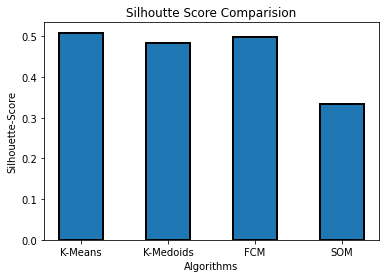

In [ ]:
#comparing different Silhouette Score values now 

from matplotlib import pyplot as plt

plt.title("Silhoutte Score Comparision")

# Data
algo = ['K-Means', 'K-Medoids', 'FCM', 'SOM']
score  = [.509, .484, .498, .335]

# Plot
plt.bar(algo, score, width=0.50, edgecolor='k', linewidth=2)

plt.xlabel("Algorithms")
plt.ylabel("Silhouette-Score")


Text(0, 0.5, 'Silhouette-Score')

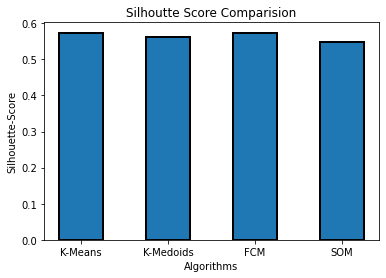

In [ ]:
#comparing different Silhouette Score values

from matplotlib import pyplot as plt

plt.title("Silhoutte Score Comparision")

# Data
algo = ['K-Means', 'K-Medoids', 'FCM', 'SOM']
score  = [.574, .563, .573, .549]

# Plot
plt.bar(algo, score, width=0.50, edgecolor='k', linewidth=2)

plt.xlabel("Algorithms")
plt.ylabel("Silhouette-Score")
